In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as mlp 
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
data = pd.read_csv("C:\\Users\\Nehal\\OneDrive\\Documents\\pricerunner_aggregate.csv", header=None)

In [3]:
data.head()

,0,1,2,3,4,5,6
0,1,apple iphone 8 plus 64gb silver,1,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
1,2,apple iphone 8 plus 64 gb spacegrau,2,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
2,3,apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim...,3,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
3,4,apple iphone 8 plus 64gb space grey,4,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
4,5,apple iphone 8 plus gold 5.5 64gb 4g unlocked ...,5,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones


In [4]:
data.columns = ('Product ID','Product Title', 'Vendor ID', 'Cluster ID', 'Cluster Label', 'Category ID', 'Category Label' ) 

In [5]:
data.head()

,Product ID,Product Title,Vendor ID,Cluster ID,Cluster Label,Category ID,Category Label
0,1,apple iphone 8 plus 64gb silver,1,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
1,2,apple iphone 8 plus 64 gb spacegrau,2,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
2,3,apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim...,3,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
3,4,apple iphone 8 plus 64gb space grey,4,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
4,5,apple iphone 8 plus gold 5.5 64gb 4g unlocked ...,5,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones


In [6]:
data.tail()

,Product ID,Product Title,Vendor ID,Cluster ID,Cluster Label,Category ID,Category Label
35306,47350,smeg fab28 60cm retro style right hand hinge f...,59,47517,Smeg FAB28 Cream,2623,Fridges
35307,47351,smeg fab28 60cm retro style left hand hinge fr...,59,47518,Smeg FAB28 Red,2623,Fridges
35308,47352,smeg fab28 60cm retro style left hand hinge fr...,59,47519,Smeg FAB28 Pink,2623,Fridges
35309,47355,candy 60cm built under larder fridge cru160nek,125,47524,Candy CRU16.0,2623,Fridges
35310,47358,neff k4316x7gb built under larder fridge,179,47525,Neff K4316,2623,Fridges


In [7]:
#Data Cleaning

In [8]:
data.isnull().sum()

Product ID        0
Product Title     0
Vendor ID         0
Cluster ID        0
Cluster Label     0
Category ID       0
Category Label    0
dtype: int64

In [9]:
data.shape

(35311, 7)

In [10]:
data.dtypes

Product ID         int64
Product Title     object
Vendor ID          int64
Cluster ID         int64
Cluster Label     object
Category ID        int64
Category Label    object
dtype: object

In [11]:
data.describe()

,Product ID,Vendor ID,Cluster ID,Category ID
count,35311.000000,35311.000000,35311.000000,35311.000000
mean,26150.800176,120.501883,30110.687633,2618.142930
std,13498.191220,117.045557,18410.265642,3.600708
min,1.000000,1.000000,1.000000,2612.000000
25%,14958.500000,17.000000,6123.000000,2615.000000
50%,27614.000000,75.000000,40630.000000,2619.000000
75%,37508.500000,253.000000,44059.000000,2622.000000
max,47358.000000,371.000000,47525.000000,2623.000000


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35311 entries, 0 to 35310
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Product ID      35311 non-null  int64 
 1   Product Title   35311 non-null  object
 2   Vendor ID       35311 non-null  int64 
 3   Cluster ID      35311 non-null  int64 
 4   Cluster Label   35311 non-null  object
 5   Category ID     35311 non-null  int64 
 6   Category Label  35311 non-null  object
dtypes: int64(4), object(3)
memory usage: 1.9+ MB


Product ID        0
Product Title     0
Vendor ID         0
Cluster ID        0
Cluster Label     0
Category ID       0
Category Label    0
dtype: int64


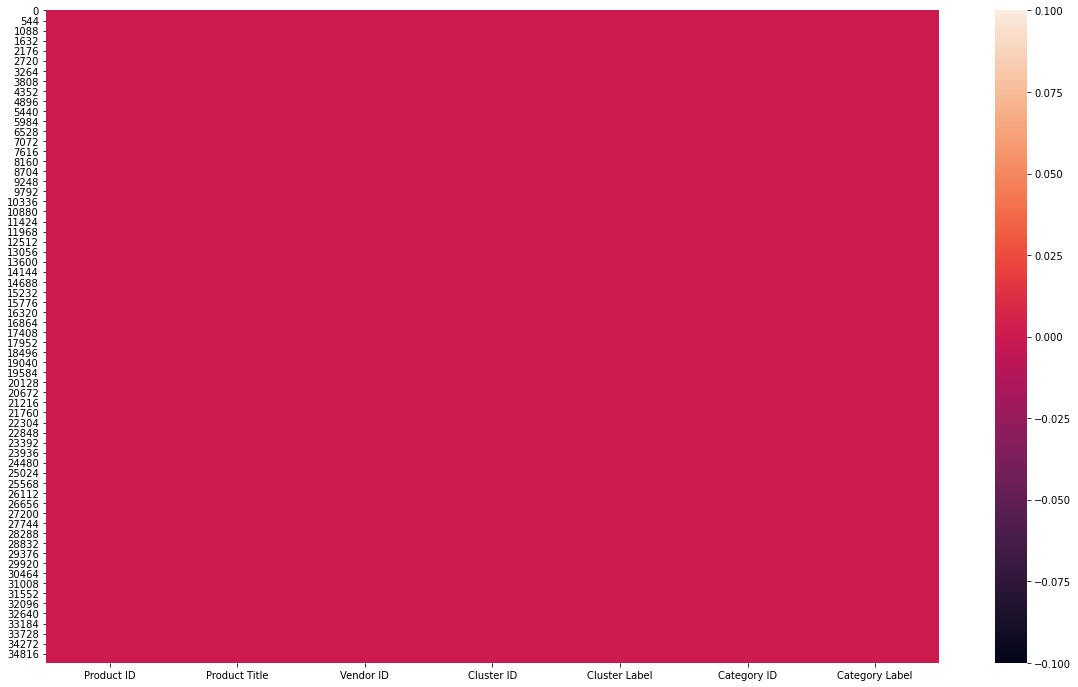

In [13]:
print(data.isna().sum())
plt.figure(figsize = (20,12))
sns.heatmap(data.isnull())
plt.show()

In [14]:
data_corr = data.corr()
data_corr

,Product ID,Vendor ID,Cluster ID,Category ID
Product ID,1.000000,0.478413,0.910393,0.993276
Vendor ID,0.478413,1.000000,0.468902,0.470781
Cluster ID,0.910393,0.468902,1.000000,0.928323
Category ID,0.993276,0.470781,0.928323,1.000000


<AxesSubplot:>

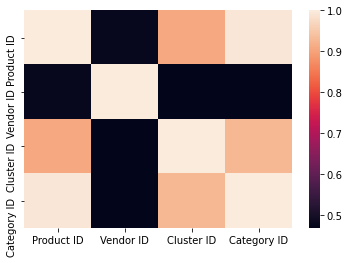

In [15]:
sns.heatmap(data_corr)

In [16]:
from sklearn import preprocessing

In [17]:
data['Product Title'].unique()

array(['apple iphone 8 plus 64gb silver',
       'apple iphone 8 plus 64 gb spacegrau',
       'apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim free smartphone in gold',
       ...,
       'smeg fab28 60cm retro style left hand hinge fridge with icebox pink',
       'candy 60cm built under larder fridge cru160nek',
       'neff k4316x7gb built under larder fridge'], dtype=object)

In [18]:
data['Cluster Label'].value_counts()

Canon IXUS 185                     27
Samsung UE49NU7100                 24
Canon PowerShot SX730 HS           24
Apple iPhone 8 Plus 64GB           23
Canon IXUS 285 HS                  23
                                   ..
Nokia N8                            1
Emporia Essential                   1
Bosch KAD99PI30 Stainless Steel     1
Intel Core i3-4350 3.6GHz  Box      1
HTC ChaCha                          1
Name: Cluster Label, Length: 12849, dtype: int64

In [19]:
data['Category Label'].value_counts()

Fridge Freezers     5501
Mobile Phones       4081
Washing Machines    4044
CPUs                3862
Fridges             3584
TVs                 3564
Dishwashers         3424
Digital Cameras     2697
Microwaves          2342
Freezers            2212
Name: Category Label, dtype: int64

In [20]:
data.head()

,Product ID,Product Title,Vendor ID,Cluster ID,Cluster Label,Category ID,Category Label
0,1,apple iphone 8 plus 64gb silver,1,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
1,2,apple iphone 8 plus 64 gb spacegrau,2,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
2,3,apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim...,3,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
3,4,apple iphone 8 plus 64gb space grey,4,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
4,5,apple iphone 8 plus gold 5.5 64gb 4g unlocked ...,5,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones


In [21]:
df5 = data[["Product ID", "Vendor ID","Cluster ID","Cluster Label","Category ID","Category Label"]]

In [22]:
df5.head()

,Product ID,Vendor ID,Cluster ID,Cluster Label,Category ID,Category Label
0,1,1,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
1,2,2,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
2,3,3,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
3,4,4,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
4,5,5,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones


In [23]:
data['Category Label'].unique()

array(['Mobile Phones', 'TVs', 'CPUs', 'Digital Cameras', 'Microwaves',
       'Dishwashers', 'Washing Machines', 'Freezers', 'Fridge Freezers',
       'Fridges'], dtype=object)

In [24]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

data["Category Label"]= le.fit_transform(data["Category Label"])


In [25]:
data.head()

,Product ID,Product Title,Vendor ID,Cluster ID,Cluster Label,Category ID,Category Label
0,1,apple iphone 8 plus 64gb silver,1,1,Apple iPhone 8 Plus 64GB,2612,7
1,2,apple iphone 8 plus 64 gb spacegrau,2,1,Apple iPhone 8 Plus 64GB,2612,7
2,3,apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim...,3,1,Apple iPhone 8 Plus 64GB,2612,7
3,4,apple iphone 8 plus 64gb space grey,4,1,Apple iPhone 8 Plus 64GB,2612,7
4,5,apple iphone 8 plus gold 5.5 64gb 4g unlocked ...,5,1,Apple iPhone 8 Plus 64GB,2612,7


In [26]:
df3=data

In [27]:
df3.head()

,Product ID,Product Title,Vendor ID,Cluster ID,Cluster Label,Category ID,Category Label
0,1,apple iphone 8 plus 64gb silver,1,1,Apple iPhone 8 Plus 64GB,2612,7
1,2,apple iphone 8 plus 64 gb spacegrau,2,1,Apple iPhone 8 Plus 64GB,2612,7
2,3,apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim...,3,1,Apple iPhone 8 Plus 64GB,2612,7
3,4,apple iphone 8 plus 64gb space grey,4,1,Apple iPhone 8 Plus 64GB,2612,7
4,5,apple iphone 8 plus gold 5.5 64gb 4g unlocked ...,5,1,Apple iPhone 8 Plus 64GB,2612,7


In [28]:
data.drop('Product Title', axis=1, inplace=True)

In [29]:
data.drop('Cluster Label', axis=1, inplace=True)

In [30]:
data.head()

,Product ID,Vendor ID,Cluster ID,Category ID,Category Label
0,1,1,1,2612,7
1,2,2,1,2612,7
2,3,3,1,2612,7
3,4,4,1,2612,7
4,5,5,1,2612,7


In [31]:
scaler = preprocessing.StandardScaler()

scaler.fit(data)
Data_scaled_array = scaler.transform(data)
Data_scaled = pd.DataFrame(Data_scaled_array, columns = data.columns)

Data_scaled.sample(5)

,Product ID,Vendor ID,Cluster ID,Category ID,Category Label
16447,0.003497,0.012800,0.556997,-0.039696,0.472126
6385,-1.017247,-0.884300,-1.372824,-1.150604,1.163392
1865,-1.798918,-0.773230,-1.619266,-1.706058,0.817759
21043,0.382071,-0.841581,0.644612,0.515759,1.509025
26976,0.884516,0.089694,0.761125,1.071213,-0.219139


In [32]:
#k-means

In [33]:
from sklearn.cluster import KMeans

nclusters = 4 
seed = 0

km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(Data_scaled)

y_cluster_kmeans = km.predict(Data_scaled)
y_cluster_kmeans

array([0, 0, 0, ..., 1, 1, 1])

In [34]:
from sklearn import metrics
score = metrics.silhouette_score(Data_scaled, y_cluster_kmeans)
score

0.49554789704582086

In [35]:
#comment

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


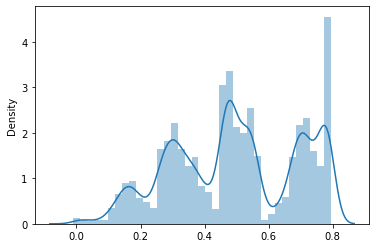

In [36]:
scores = metrics.silhouette_samples(Data_scaled, y_cluster_kmeans)
sns.distplot(scores);

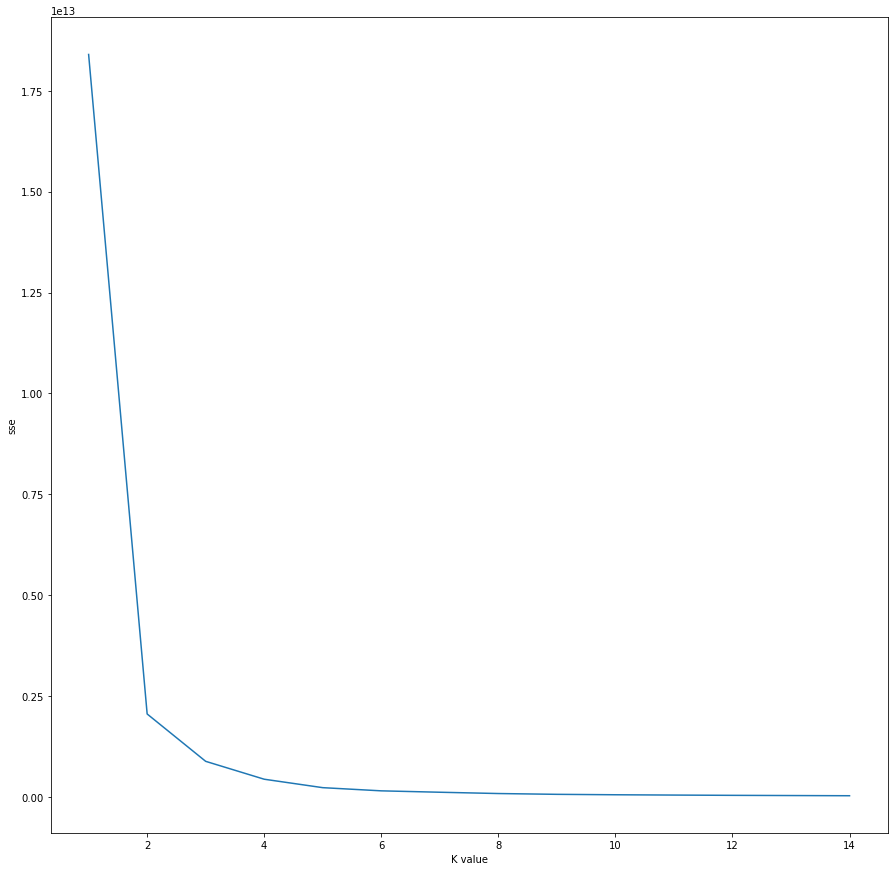

In [37]:
from sklearn.cluster import KMeans
wcss = [] 

for k in range(1, 15):
    kmeansForLoop = KMeans(n_clusters = k)
    kmeansForLoop.fit(data)
    wcss.append(kmeansForLoop.inertia_)

plt.figure(figsize = (15, 15))
plt.plot(range(1, 15), wcss)
plt.xlabel("K value")
plt.ylabel("sse")
plt.show()

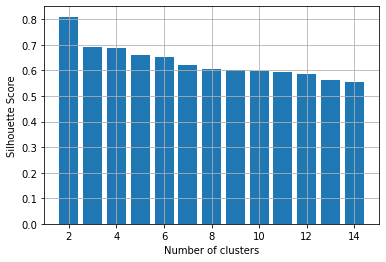

In [38]:
from sklearn.metrics import silhouette_score
silhouette_scores = [] 

for n_cluster in range(2,15):
    silhouette_scores.append( 
        silhouette_score(data, KMeans(n_clusters = n_cluster).fit_predict(data))) 
    
k = [2, 3, 4, 5, 6,7,8,9,10,11,12,13,14]
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.grid()
plt.show()

In [39]:
nclusters = 2 # this is the k in kmeans
seed = 0

km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(Data_scaled)

# predict the cluster for each data point
y_cluster_kmeans = km.predict(Data_scaled)
y_cluster_kmeans

array([0, 0, 0, ..., 1, 1, 1])

In [40]:
score = metrics.silhouette_score(Data_scaled, y_cluster_kmeans)
score

0.503100752771834

In [41]:
km.inertia_

82470.51612388378

In [42]:
km.cluster_centers_

array([[-1.21696526, -0.64410723, -1.42469048, -1.25438647,  0.11279676],
       [ 0.58828849,  0.31136539,  0.68870414,  0.60637814, -0.05452665]])

In [43]:
Data_scaled.head()

,Product ID,Vendor ID,Cluster ID,Category ID,Category Label
0,-1.937309,-1.021001,-1.635507,-1.706058,0.817759
1,-1.937235,-1.012457,-1.635507,-1.706058,0.817759
2,-1.937161,-1.003913,-1.635507,-1.706058,0.817759
3,-1.937087,-0.995369,-1.635507,-1.706058,0.817759
4,-1.937013,-0.986825,-1.635507,-1.706058,0.817759


In [44]:
kmeans = KMeans(n_clusters = 2)
clusters = kmeans.fit_predict(Data_scaled)
Data_scaled["type"] = clusters
Data_scaled["type"].unique()

array([1, 0])

In [45]:
Data_scaled.head()

,Product ID,Vendor ID,Cluster ID,Category ID,Category Label,type
0,-1.937309,-1.021001,-1.635507,-1.706058,0.817759,1
1,-1.937235,-1.012457,-1.635507,-1.706058,0.817759,1
2,-1.937161,-1.003913,-1.635507,-1.706058,0.817759,1
3,-1.937087,-0.995369,-1.635507,-1.706058,0.817759,1
4,-1.937013,-0.986825,-1.635507,-1.706058,0.817759,1


In [46]:
Data_scaled.describe()

,Product ID,Vendor ID,Cluster ID,Category ID,Category Label,type
count,3.531100e+04,3.531100e+04,3.531100e+04,3.531100e+04,3.531100e+04,35311.000000
mean,3.863693e-15,2.396359e-14,-1.760256e-15,1.124909e-14,1.609471e-14,0.325876
std,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,0.468708
min,-1.937309e+00,-1.021001e+00,-1.635507e+00,-1.706058e+00,-1.601670e+00,0.000000
25%,-8.291821e-01,-8.842997e-01,-1.302970e+00,-8.728768e-01,-9.104048e-01,0.000000
50%,1.084012e-01,-3.887591e-01,5.713911e-01,2.380316e-01,-2.191393e-01,0.000000
75%,8.414357e-01,1.132038e+00,7.576485e-01,1.071213e+00,8.177591e-01,1.000000
max,1.571136e+00,2.140207e+00,9.459157e-01,1.348940e+00,1.509025e+00,1.000000


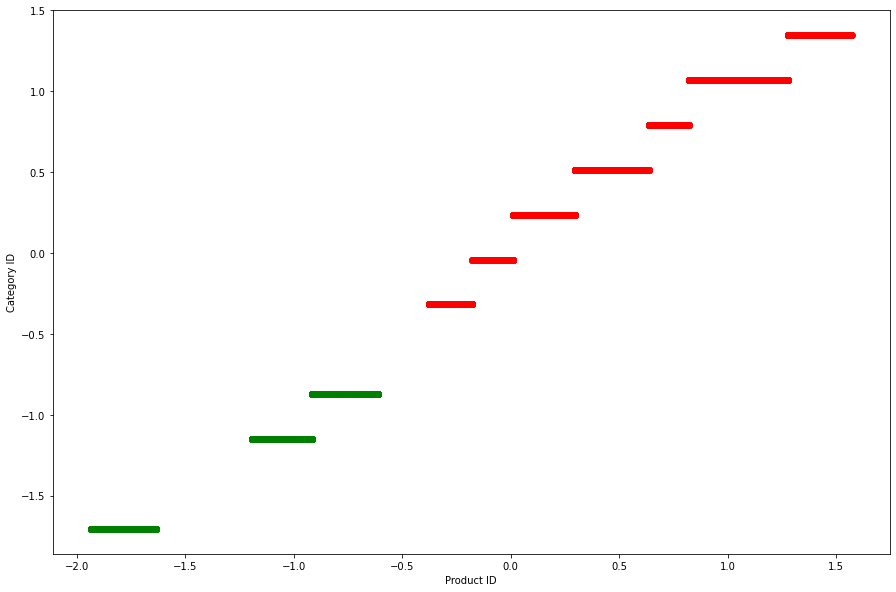

In [47]:
plt.figure(figsize = (15, 10))
plt.scatter(Data_scaled["Product ID"][Data_scaled["type"] == 0], Data_scaled["Category ID"][Data_scaled["type"] == 0], color = "red")
plt.scatter(Data_scaled["Product ID"][Data_scaled["type"] == 1], Data_scaled["Category ID"][Data_scaled["type"] == 1], color = "green")
plt.xlabel('Product ID')
plt.ylabel('Category ID')
plt.show()

In [48]:
kmeans.cluster_centers_

array([[ 0.58828849,  0.31136539,  0.68870414,  0.60637814, -0.05452665],
       [-1.21696526, -0.64410723, -1.42469048, -1.25438647,  0.11279676]])

In [49]:
# K-means++

In [50]:
from sklearn.cluster import KMeans
wcss=[]

#we always assume the max number of cluster would be 10
#you can judge the number of clusters by doing averaging
###Static code to get max no of clusters

for i in range(1,30):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

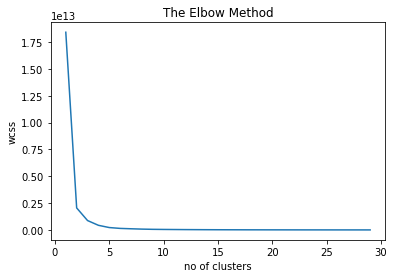

In [51]:
#Visualizing the ELBOW method to get the optimal value of K 
plt.plot(range(1,30), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [52]:
#Model Build   (K-means)
kmeansmodel = KMeans(n_clusters= 5, random_state=0)
y_kmeans= kmeansmodel.fit_predict(data)

In [53]:
score = metrics.silhouette_score(data, y_kmeans)
score

0.6590241161218353

In [54]:
# silhouette score value near to 0.5 or better provides good evidence of the reality of the clusters in the data


In [55]:
# Agglomerative Clustering

In [56]:
data.head()

,Product ID,Vendor ID,Cluster ID,Category ID,Category Label
0,1,1,1,2612,7
1,2,2,1,2612,7
2,3,3,1,2612,7
3,4,4,1,2612,7
4,5,5,1,2612,7


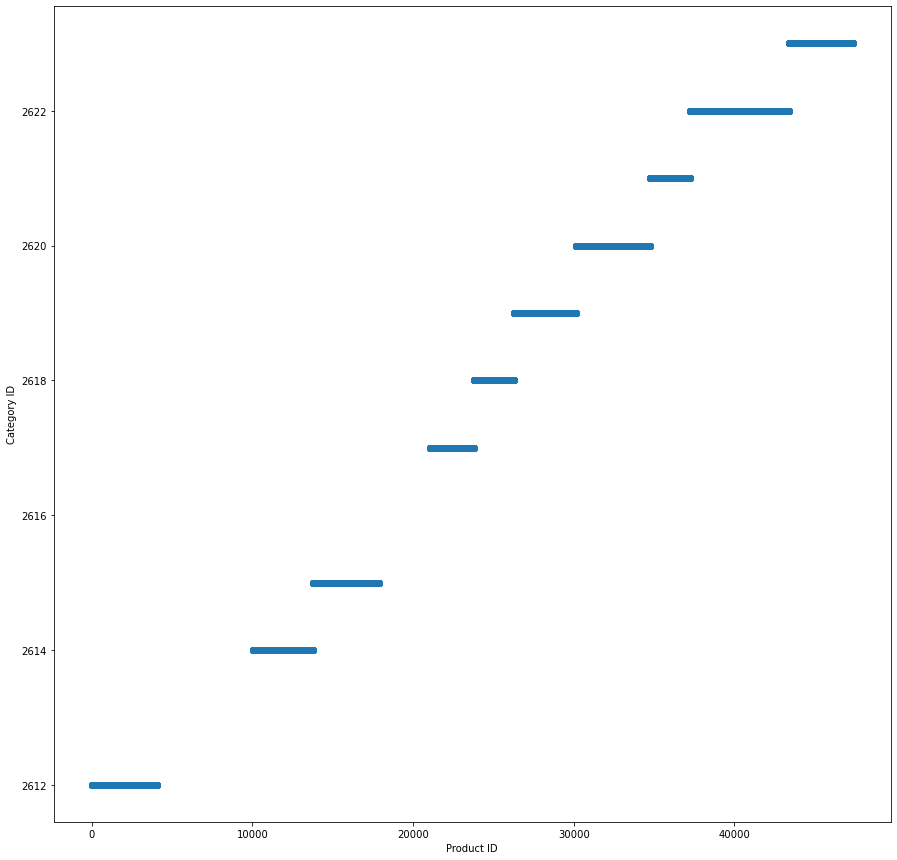

In [57]:
plt.figure(figsize = (15, 15))
plt.scatter(data["Product ID"], data["Category ID"])
plt.xlabel('Product ID')
plt.ylabel('Category ID')
plt.show()

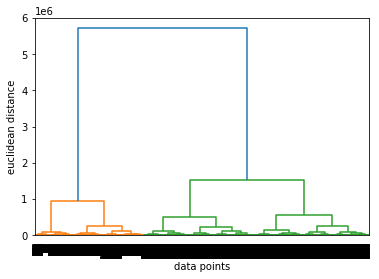

In [58]:
from scipy.cluster.hierarchy import linkage,dendrogram
merg = linkage(data, method = "ward")
dendrogram(merg, leaf_rotation = 90)
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()

In [60]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = "euclidean", linkage = "ward")
cluster = hc.fit_predict(data)
Data["label"] = cluster

NameError: name 'Data' is not defined

In [61]:
Data.label.value_counts()

NameError: name 'Data' is not defined

In [62]:
dataWithoutTypes= data[['Product ID','Category ID']]

In [63]:
dataWithoutTypes.head()

,Product ID,Category ID
0,1,2612
1,2,2612
2,3,2612
3,4,2612
4,5,2612


In [ ]:
from scipy.cluster.hierarchy import linkage,dendrogram
merg = linkage(dataWithoutTypes, method = "ward")
dendrogram(merg, leaf_rotation = 90)
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = "euclidean", linkage = "ward")
cluster = hc.fit_predict(dataWithoutTypes)
dataWithoutTypes["label"] = cluster

In [ ]:
dataWithoutTypes.label.value_counts()

In [ ]:
# Data after hierarchical clustering

plt.figure(figsize = (15, 10))
plt.scatter(dataWithoutTypes["Product ID"][dataWithoutTypes.label == 0], dataWithoutTypes["Category ID"][dataWithoutTypes.label == 0], color = "red")
plt.scatter(dataWithoutTypes["Product ID"][dataWithoutTypes.label == 1], dataWithoutTypes["Category ID"][dataWithoutTypes.label == 1], color = "blue")
plt.xlabel("Product ID")
plt.ylabel("Category ID")
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = "euclidean", linkage = "ward")
cluster = hc.fit_predict(dataWithoutTypes)
dataWithoutTypes["label"] = cluster

In [ ]:
dataWithoutTypes.label.value_counts()

In [ ]:
# Data after hierarchical clustering

plt.figure(figsize = (15, 10))
plt.scatter(dataWithoutTypes["Product ID"][dataWithoutTypes.label == 0], dataWithoutTypes["Customer ID"][dataWithoutTypes.label == 0], color = "red")
plt.scatter(dataWithoutTypes["Product ID"][dataWithoutTypes.label == 1], dataWithoutTypes["Customer ID"][dataWithoutTypes.label == 1], color = "blue")
plt.xlabel("Product ID")
plt.ylabel("Customer ID")
plt.show()